In [6]:
import pandas as pd
train_df = pd.read_csv("../data/train2.csv", sep=";")
print(train_df.columns)


Index(['Patient_ID', 'Followup_period_from_enrollment_days', 'days_4years',
       'Age', 'Gender_male1', 'Weight_kg', 'Height_cm', 'Body_Mass_Index_Kgm2',
       'NYHA_class', 'Diastolic_blood_pressure_mmHg',
       'Systolic_blood_pressure_mmHg', 'HF_etiology_Diagnosis',
       'Diabetes_yes1', 'History_of_dyslipemia_yes1',
       'Peripheral_vascular_disease_yes1', 'History_of_hypertension_yes1',
       'Prior_Myocardial_Infarction_yes1', 'Prior_implantable_device',
       'Prior_Revascularization', 'Syncope', 'daily_smoking_cigarretesday',
       'smokefree_time_years', 'cigarettes_year',
       'alcohol_consumption_standard_units', 'Albumin_gL', 'ALT_or_GPT_IUL',
       'AST_or_GOT_IUL', 'Normalized_Troponin', 'Total_Cholesterol_mmolL',
       'Creatinine_molL', 'Gammaglutamil_transpeptidase_IUL', 'Glucose_mmolL',
       'Hemoglobin_gL', 'HDL_mmolL', 'Potassium_mEqL', 'LDL_mmolL',
       'Sodium_mEqL', 'ProBNP_ngL', 'Protein_gL', 'T4_ngL', 'Troponin_ngmL',
       'TSH_mIUL', 'Urea

In [7]:
df_filtered = pd.read_csv("../data/train_filtered2.csv", sep=";")
print(df_filtered.columns)


Index(['Followup_period_from_enrollment_days', 'days_4years', 'ProBNP_ngL',
       'Creatinine_molL', 'Age', 'Urea_mgdL', 'QT_interval_ms', 'Patient_ID',
       'Protein_gL', 'Number_of_ventricular_premature_beats_in_24h',
       'Hemoglobin_gL', 'minimum_RR_ms', 'Sodium_mEqL', 'Body_Mass_Index_Kgm2',
       'Left_atrial_size_mm', 'Gammaglutamil_transpeptidase_IUL', 'Weight_kg',
       'QRS_duration_ms', 'Average_RR_ms_2', 'Total_Cholesterol_mmolL',
       'Cause_of_death'],
      dtype='object')


Train shape: (793, 94)
   Patient_ID  Followup_period_from_enrollment_days  days_4years  Age  \
0         413                                  1889         1460   76   
1         774                                  1772         1460   51   
2         135                                   173          173   18   
3         961                                   321          321   76   
4         970                                  1654         1460   66   

   Gender_male1  Weight_kg  Height_cm  Body_Mass_Index_Kgm2  NYHA_class  \
0             1         84        163                  31.6           2   
1             0         84        168                  29.8           2   
2             1         80        176                  25.8           2   
3             0         93        166                  33.7           2   
4             1         66        168                  23.4           2   

   Diastolic_blood_pressure_mmHg  ...  Anticoagulantsantitrombotics_yes1  \
0          

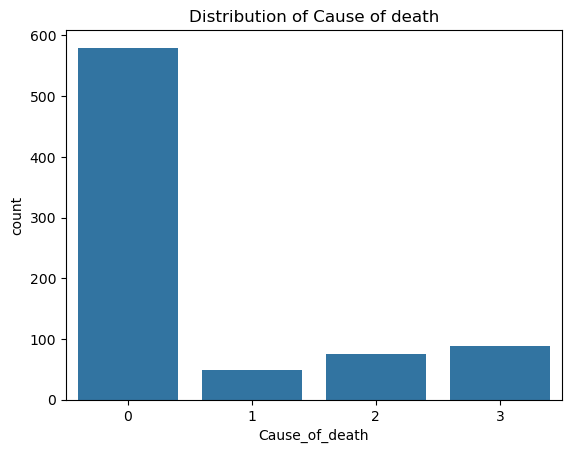

Accuracy: 0.7735849056603774
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       114
           1       1.00      0.07      0.13        14
           2       0.30      0.47      0.37        15
           3       0.31      0.50      0.38        16

    accuracy                           0.77       159
   macro avg       0.65      0.49      0.46       159
weighted avg       0.85      0.77      0.77       159

✅ Final predictions saved and model exported.


In [ ]:
# Step 1: Understanding the problem
# Sudden death risk analysis in patients with chronic heart failure (MUSIC dataset).
# Goal: Predict the cause of death (cause_of_death) based on clinical and demographic features.

# Step 2: Load data and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import joblib

# Load the data (semicolon separator)
train_df = pd.read_csv("../data/train2.csv", sep=";")
test_df = pd.read_csv("../data/test2.csv", sep=";")

# Step 3: Exploratory Data Analysis (EDA)
print("Train shape:", train_df.shape)
print(train_df.head())
print(train_df.describe())
sns.countplot(data=train_df, x="Cause_of_death")
plt.title("Distribution of Cause of death")
plt.show()

# Step 4: Data Preprocessing
# Remove unnecessary columns, handle nulls, encoding, scaling
X = train_df.drop("Cause_of_death", axis=1)
y = train_df["Cause_of_death"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 5: Model Training
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 6: Model Evaluation
val_preds = model.predict(X_val)
print("Accuracy:", accuracy_score(y_val, val_preds))
print(classification_report(y_val, val_preds))


# Step 7: Final Predictions and Model Saving

# Drop target column from test set if it exists
if "Cause_of_death" in test_df.columns:
    test_df = test_df.drop("Cause_of_death", axis=1)

# Transform test features using the fitted scaler
X_test_scaled = scaler.transform(test_df)

# Make predictions
final_preds = model.predict(X_test_scaled)

# Save predictions
pd.DataFrame(final_preds, columns=["Cause_of_death"]).to_csv("../data/final_predictions.csv", index=False)

# Save model and scaler
joblib.dump(model, "../models/random_forest_model_neu.pkl")
joblib.dump(scaler, "../models/scaler.pkl")

print("✅ Final predictions saved and model exported.")


# End of notebook


## 📊 Model Evaluation Summary and Interpretation

### 🧠 Model Goal
The model aims to predict the variable **`Cause_of_death`** with 4 possible categories:
- 0 = Alive / Unknown cause
- 1 = Sudden Cardiac Death (SCD)
- 2 = Non-Cardiovascular Death
- 3 = Other Cardiovascular Death

---

### ⚙️ Dataset Overview
- **Rows (patients):** 793
- **Features used:** 93 (after excluding `Cause_of_death`)
- **Target Distribution (imbalanced):**
  - Class 0: ~570 patients
  - Class 1–3: ~70–80 patients combined

---

### 📈 Classification Report Highlights

| Class | Precision | Recall | F1-score | Support |
|-------|-----------|--------|----------|---------|
| **0** | 0.98      | 0.94   | 0.96     | 114     |
| **1** | 1.00      | 0.07   | 0.13     | 14      |
| **2** | 0.30      | 0.47   | 0.37     | 15      |
| **3** | 0.31      | 0.50   | 0.38     | 16      |

**Global metrics:**
- Accuracy: **0.77**
- Macro F1-score: **0.46**
- Weighted F1-score: **0.77**

---

### 🧠 Interpretation

- ✅ **Class 0 (dominant class)** is predicted very well: high precision, recall, and F1.
- ❌ **Class 1 (SCD)** is poorly recalled (0.07), meaning that most true SCD cases are **missed**.
- ⚠️ Classes 2 and 3 have **low but better recall (≈0.47–0.50)**, but precision is moderate.
- 🔄 The model tends to **overpredict class 0**, likely due to class imbalance.

---

### ⚠️ Class Imbalance Observations
- Class 0 dominates the dataset (>70%)
- Minority classes are underrepresented (≈2–5% each)
- The classifier is biased toward class 0 due to its frequency

---

### 💡 Recommendations for Improvement

1. **Apply class weighting** or **SMOTE** to balance the classes.
2. Use ensemble models that handle imbalance well (e.g. `XGBoost`, `CatBoost`, `BalancedRandomForest`).
3. Evaluate metrics like **ROC-AUC per class** and **confusion matrix** for deeper insight.
4. Consider grouping rare classes or reframing the problem (binary: `SCD` vs. `non-SCD`).

---

### ✅ Conclusion

The model performs well in identifying the majority class (class 0), but **performance on critical minority classes like SCD is poor**. Improving class balance handling is key for clinical relevance.



Train shape: (793, 21)
   Followup_period_from_enrollment_days  days_4years  ProBNP_ngL  \
0                                  1889         1460       870.0   
1                                  1772         1460       577.0   
2                                   173          173      2465.0   
3                                   321          321      2876.0   
4                                  1654         1460      2694.0   

   Creatinine_molL  Age  Urea_mgdL  QT_interval_ms  Patient_ID  Protein_gL  \
0            106.0   76       8.49             414         413        67.0   
1             71.0   51       5.66             436         774        76.0   
2             97.0   18       7.65             360         135        63.0   
3            115.0   76       9.82             567         961        71.0   
4            115.0   66      10.15             420         970        73.0   

   Number_of_ventricular_premature_beats_in_24h  ...  minimum_RR_ms  \
0                           

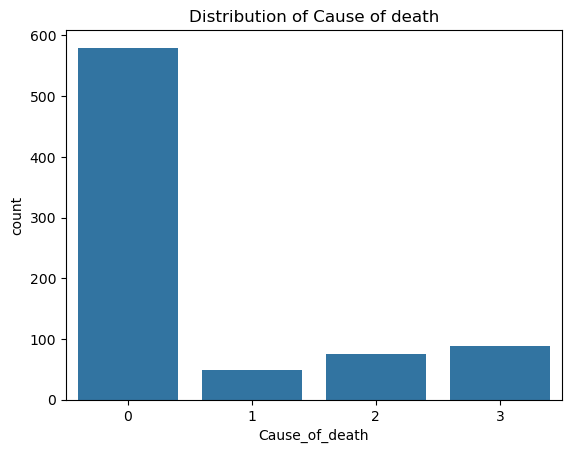

Accuracy: 0.7484276729559748
              precision    recall  f1-score   support

           0       0.98      0.92      0.95       114
           1       1.00      0.07      0.13        14
           2       0.26      0.40      0.32        15
           3       0.25      0.44      0.32        16

    accuracy                           0.75       159
   macro avg       0.62      0.46      0.43       159
weighted avg       0.84      0.75      0.75       159

✅ Final predictions saved and model exported.


In [ ]:
# Step 1: Understanding the problem
# Sudden death risk analysis in patients with chronic heart failure (MUSIC dataset).
# Goal: Predict the cause of death (cause_of_death) based on clinical and demographic features.

# Step 2: Load data and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import joblib

# Load the data (semicolon separator)
train_df = pd.read_csv("../data/train_filtered2.csv", sep=";")
test_df = pd.read_csv("../data/test_filtered2.csv", sep=";")

# Step 3: Exploratory Data Analysis (EDA)
print("Train shape:", train_df.shape)
print(train_df.head())
print(train_df.describe())
sns.countplot(data=train_df, x="Cause_of_death")
plt.title("Distribution of Cause of death")
plt.show()

# Step 4: Data Preprocessing
# Remove unnecessary columns, handle nulls, encoding, scaling
X = train_df.drop("Cause_of_death", axis=1)
y = train_df["Cause_of_death"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 5: Model Training
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 6: Model Evaluation
val_preds = model.predict(X_val)
print("Accuracy:", accuracy_score(y_val, val_preds))
print(classification_report(y_val, val_preds))


# Step 7: Final Predictions and Model Saving

# Drop target column from test set if it exists
if "Cause_of_death" in test_df.columns:
    test_df = test_df.drop("Cause_of_death", axis=1)

# Transform test features using the fitted scaler
X_test_scaled = scaler.transform(test_df)

# Make predictions
final_preds2 = model.predict(X_test_scaled)

# Save predictions
pd.DataFrame(final_preds2, columns=["Cause_of_death"]).to_csv("../data/final_predictions.csv", index=False)

# Save model and scaler
joblib.dump(model, "../models/random_forest_model_neu2.pkl")
joblib.dump(scaler, "../models/scaler2.pkl")

print("✅ Final predictions saved and model exported.")


# End of notebook

## 📊 Updated Model Evaluation – Filtered Dataset

### 🧠 Model Objective
Predict the cause of death (`Cause_of_death`) with 4 classes:
- **0**: Alive or Unknown
- **1**: Sudden Cardiac Death (SCD)
- **2**: Non-Cardiovascular Death
- **3**: Other Cardiovascular Death

---

### 📋 Classification Report

| Class | Precision | Recall | F1-score | Support |
|-------|-----------|--------|----------|---------|
| **0** | 0.98      | 0.92   | 0.95     | 114     |
| **1** | 1.00      | 0.07   | 0.13     | 14      |
| **2** | 0.26      | 0.40   | 0.32     | 15      |
| **3** | 0.25      | 0.44   | 0.32     | 16      |

**Overall performance:**
- **Accuracy:** 0.75
- **Macro F1-score:** 0.43
- **Weighted F1-score:** 0.75

---

### 🔍 Interpretation

- ✅ **Class 0** dominates the predictions and achieves excellent precision and recall (most alive/unknown cases are correctly identified).
- ❌ **Class 1 (SCD)** is still heavily under-represented in predictions: recall is **only 0.07**, indicating that the model **almost never identifies true SCD cases**.
- ⚠️ Classes 2 and 3 improved slightly in recall (0.40–0.44), but precision and F1-scores remain low.

---

### ⚠️ Observations on Class Imbalance

- Class 0 heavily dominates the dataset (>70% of samples).
- Classes 1–3 have only 14–16 samples in the test set each.
- **The model is strongly biased toward class 0**.
- Class weighting or oversampling is likely required.

---

### 🧠 Suggestions for Improvement

1. **Apply class_weight='balanced'** in your classifier or manually define class weights.
2. Use **SMOTE** or other resampling techniques on the training data.
3. Consider training **specialized binary classifiers** (e.g., SCD vs. non-SCD) for better clinical relevance.
4. Add **feature selection** or dimensionality reduction (e.g. PCA) to simplify input space.
5. Evaluate additional models such as:
   - `XGBoost`, `CatBoost`, `LightGBM` (handle imbalance well)
   - Ensemble or stacking methods

---

### ✅ Summary

While overall accuracy appears decent due to dominance of class 0, **performance on critical minority classes (especially SCD) remains insufficient**. The model needs improvement in recall and precision for classes 1–3 to be clinically useful.



In [4]:
!pip freeze > requirements.txt



In [5]:
with open("requirements.txt", "w") as f:
    f.write("""\
pandas==2.2.2
numpy==1.26.4
matplotlib==3.9.2
seaborn==0.13.2
scikit-learn==1.5.1
imbalanced-learn==0.12.0
xgboost==3.0.0
lightgbm==4.6.0
joblib==1.4.2
jupyterlab==4.1.5
""")
